<a href="https://colab.research.google.com/github/AryanSai/Deep-Learning/blob/main/23352_Asmt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

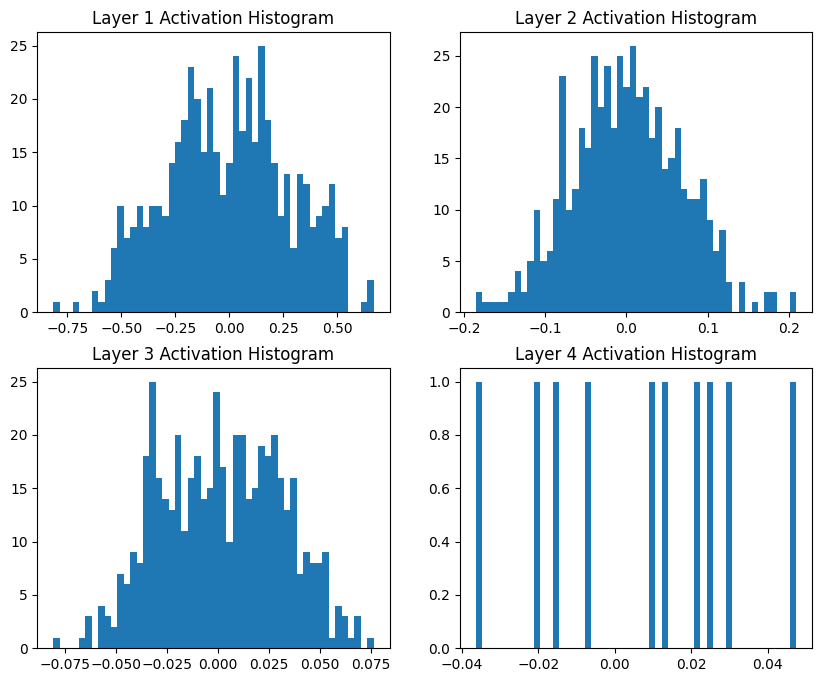

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.inputLayer = nn.Linear(1000, 500)
        nn.init.normal_(self.inputLayer.weight, mean=0, std=0.01)
        self.layer1 = nn.Linear(500, 500)
        nn.init.normal_(self.layer1.weight, mean=0, std=0.01)
        self.layer2 = nn.Linear(500, 500)
        nn.init.normal_(self.layer2.weight, mean=0, std=0.01)
        self.outputlayer = nn.Linear(500, 10)
        nn.init.normal_(self.outputlayer.weight, mean=0, std=0.01)

        self.flatten = nn.Flatten()  # flatten layer before sending to the linear layers

        self.linear_stack = nn.Sequential(
            self.inputLayer,
            nn.Tanh(),
            self.layer1,
            nn.Tanh(),
            self.layer2,
            nn.Tanh(),
            self.outputlayer,
            nn.Tanh(),
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits

model = NeuralNetwork()

# Forward propagation
x = torch.randn(1, 1000)
predictions = model(x)

# Plotting histograms
activations = []
for layer in model.linear_stack:
    x = layer(x)
    if isinstance(layer, nn.Tanh):
        activations.append(x.detach().numpy().flatten())

# Plotting histograms for each layer
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, activation in enumerate(activations):
    axes[i].hist(activation, bins=50)
    axes[i].set_title(f'Layer {i + 1} Activation Histogram')

plt.show()
